# Effects of Gender on distance and duration of bike usage

## Investigation Overview

In this investigation, I will be looking at how gender affects duration of use and distance covered during the usage of the bikes.

## Dataset Overview

The data consisted of data on 183,412 bikes. The features incuded the duration sec, start time, end time, start station id, start station name, start station latitude, start station longitude, end station id, end station name, end station latitude, end station longitude, bike id, user type, member birth year, member gender, bike share for all trip. One row was removed from the data for inconsistent information. 

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe, assign to a variable
bikes = pd.read_csv("201902-fordgobike-tripdata.csv")

In [3]:
# data wrangling, removing nul values
bikes.dropna(axis = 0, inplace = True )

In [4]:
# data wrangling, removing bikes with incorrect data
incorrect_dates = bikes[bikes.member_birth_year <= 1900].index
bikes.drop(incorrect_dates, axis = 0, inplace = True)

In [5]:
#create "Distance" column
#first I assin all needed columns to a variable

start_lat = bikes["start_station_latitude"]
stat_long = bikes["start_station_longitude"]
end_long = bikes["end_station_longitude"]
end_lat = bikes["end_station_latitude"]

In [6]:
#create a function to derive the distance in KM (Using Haversine) between the start and end using the longitude and latitude provided in the dataset.

def Haversine(lat1,lon1,lat2,lon2, **kwarg):
    """
    This uses the ‘haversine’ formula to calculate the great-circle distance between two points – that is, 
    the shortest distance over the earth’s surface – giving an ‘as-the-crow-flies’ distance between the points 
    (ignoring any hills they fly over, of course!).
    Haversine
    formula:    a = sin²(Δφ/2) + cos φ1 ⋅ cos φ2 ⋅ sin²(Δλ/2)
    c = 2 ⋅ atan2( √a, √(1−a) )
    d = R ⋅ c
    where   φ is latitude, λ is longitude, R is earth’s radius (mean radius = 6,371km);
    note that angles need to be in radians to pass to trig functions!
    """
    R = 6371.0088
    lat1,lon1,lat2,lon2 = map(np.radians, [lat1,lon1,lat2,lon2])

    lat = lat2 - lat1
    lon = lon2 - lon1
    a = np.sin(lat/2)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(lon/2) **2
    c = 2 * np.arctan2(a**0.5, (1-a)**0.5)
    d = R * c
    return round(d,4)

#run the function and add as a column to the dataframe 
distance_km = Haversine(start_lat,stat_long,end_lat,end_long)
bikes.insert(0, "Distance_km", distance_km)

## Distribution of Gender

The gender categories in the bikes dataset are; Male, Female and Other. Plotted using seaborn and maintaing the default color variations. Men are by a large margin of over 80,000 more then the women and the "other " gender is the least of the 3.

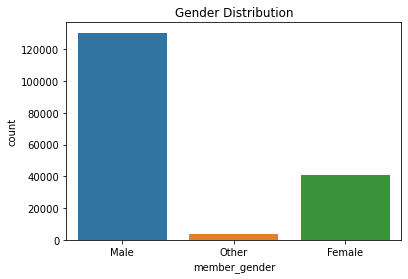

In [7]:
sb.countplot(data = bikes, x = 'member_gender').set_title('Gender Distribution');

# Distribution of Distance

Distance was derived using Haversine. It was done with data provided in the longitude and latitude columns provided in the dataset. The distance was calculated in KM and plotted on a small binsize in order to cover for the large variations in the dataset. It shows that most users covered between 1-2KMS with very few users covering more than 5KM

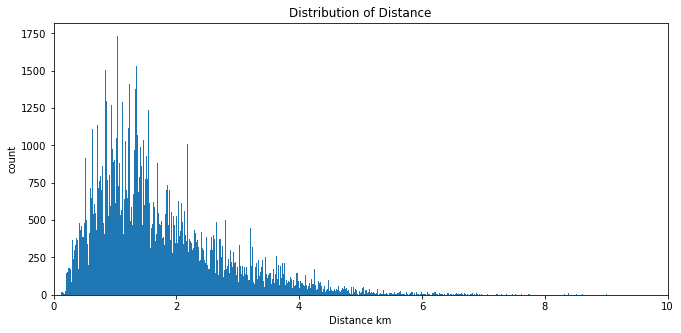

In [9]:
binsize = 0.013
bins = np.arange(0.1, bikes['Distance_km'].max()+10, 0.01)

plt.figure(figsize=[11, 5])
plt.hist(data = bikes, x = 'Distance_km', bins = bins)
plt.xlim([0,10])
plt.xlabel('Distance km')
plt.ylabel('count')
plt.title("Distribution of Distance")
plt.show()

## Distribution of Duration

The duration travelled by each biker was recorded in seconds and plotted on a log-scale. It shows a perfect slope between 150 Seconds and 2,500 seconds.

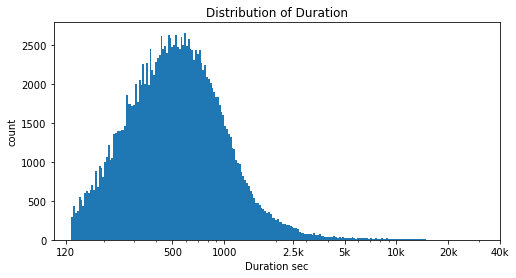

In [8]:

log_binsize = 0.0125
bins = 7 ** np.arange(2.5, np.log10(bikes['duration_sec'].max()+10)+log_binsize, log_binsize)

plt.figure(figsize=[8,4])
plt.hist(data = bikes, x = 'duration_sec', bins = bins )
plt.xscale('log')
plt.xticks([120, 500,1000, 2500, 5000, 10000, 20000, 40000], [120, '500', '1000', "2.5k", '5k','10k', '20k', '40k'])
plt.xlabel('Duration sec')
plt.ylabel('count')
plt.title("Distribution of Duration")
plt.show()

## Distance and Duration by Gender

The scatterplot was plotted with seaborn and I made use of 500 random samples to get a clearer result.
There are more men who travel longer distances and spend more time on the bikes than women or the other Gender. Women are clustered between 0 - 3 KMs and 0 - 1000 seconds. The reationship between gender and distance or duration conforms to the traditional sterotype that favours more activities from the men. The other Gender show little or no concentration to a particular range owing to their small size, but their dominance in previous illustrations of gender against distance will be because the few that were involved actually covered large distances and spent long periods.
As the distance incresed the duration also increased.

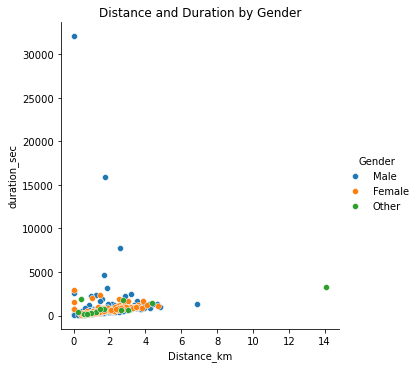

In [8]:
samp = bikes.sample(500)
comp = sb.FacetGrid(data = samp, hue = "member_gender", size = 5)
comp.map(sb.scatterplot,"Distance_km", "duration_sec").set(title = "Distance and Duration by Gender")
comp.add_legend(title = "Gender");

In [ ]:
!jupyter nbconvert Ude_Fortune_Part2.ipynb --to slides --post serve --no-input --no-prompt